In [15]:
import msgpack
import pandas as pd
import uuid
import time
import threading
import random
import capnp
import data_capnp
from bw2python import ponames
from bw2python.bwtypes import PayloadObject
%matplotlib inline
RAW  = 0
MEAN = 1 << 1
MIN = 1 <<  2
MAX = 1 << 3
COUNT = 1 << 4

In [16]:
from client import MDALClient
mdal = MDALClient("scratch.ns")

Saw [scratch.ns] MDAL -1 hours 86399 seconds 377.036 ms ago


In [17]:
query = {
    "Composition": ["temp"],
    "Selectors": [MEAN, MEAN],
    "Variables": [
        {"Name": "meter",
         "Definition": "SELECT ?meter_uuid WHERE { ?meter rdf:type/rdfs:subClassOf* brick:Electric_Meter . ?meter bf:uuid ?meter_uuid . };",
         "Units": "kW",
        },
        {"Name": "temp",
         "Definition": "SELECT ?temp_uuid WHERE { ?temp rdf:type/rdfs:subClassOf* brick:Temperature_Sensor . ?temp bf:uuid ?temp_uuid . ?temp bf:isLocatedIn/bf:type brick:Room . };",
         "Units": "F",
        },
    ],
    "Time": {
        "T0": "2017-10-01 00:00:00",
        "T1": "2017-10-05 00:00:00",
        "WindowSize": int(1e9*60*30),
        "Aligned": True,
    },
    "Params": {
        "Statistical": False,
        "Window": True,
    },
}
t = time.time()
resp = mdal.do_query(query,timeout=120)
t2 = time.time()
print (t2-t)

2.39006495476


In [18]:
df = resp['df']

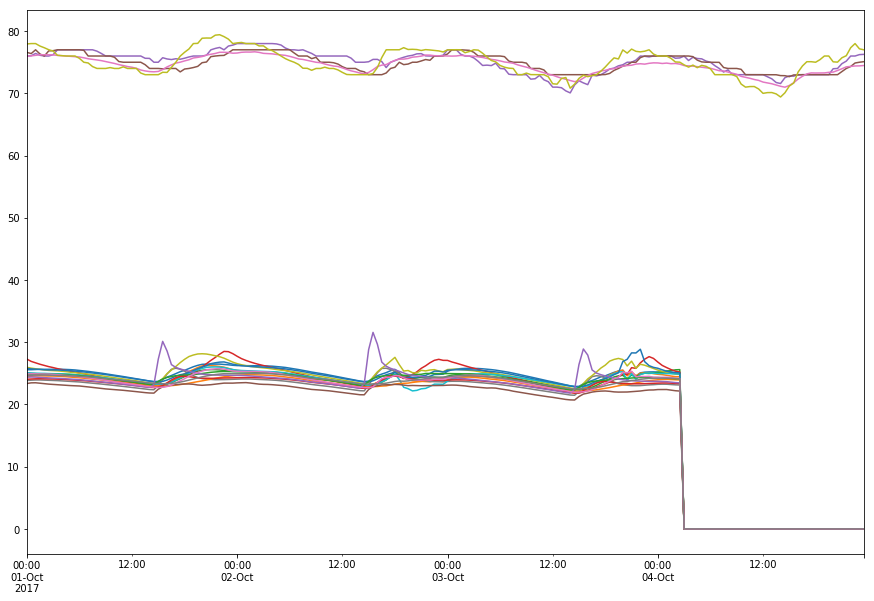

In [19]:
df.plot(legend=False, figsize=(15,10))

{'df':                      f1baf473-8578-340d-8a8c-96482dc3f0b2  \
 2017-01-01 00:00:00                                   0.0   
 2017-01-01 00:30:00                                   0.0   
 2017-01-01 01:00:00                                   0.0   
 2017-01-01 01:30:00                                   0.0   
 2017-01-01 02:00:00                                   0.0   
 2017-01-01 02:30:00                                   0.0   
 2017-01-01 03:00:00                                   0.0   
 2017-01-01 03:30:00                                   0.0   
 2017-01-01 04:00:00                                   0.0   
 2017-01-01 04:30:00                                   0.0   
 2017-01-01 05:00:00                                   0.0   
 2017-01-01 05:30:00                                   0.0   
 2017-01-01 06:00:00                                   0.0   
 2017-01-01 06:30:00                                   0.0   
 2017-01-01 07:00:00                                   0.0   
 2